In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8684 - loss: 0.4702
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9667 - loss: 0.1101
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0708


In [10]:
model.save('handwritten.keras')

In [11]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model = tf.keras.models.load_model('handwritten.keras', custom_objects={'RMSprop': optimizer})

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1009


In [13]:
print(loss)

0.088957779109478


In [15]:
print(accuracy)

0.972599983215332


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The number is probably a 7


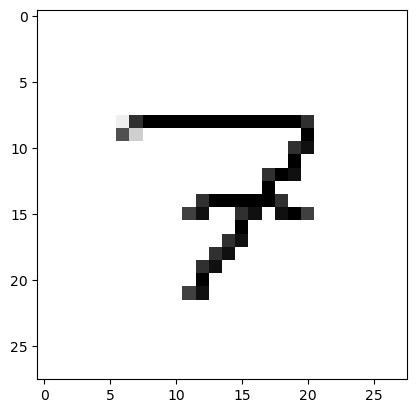

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The number is probably a 0


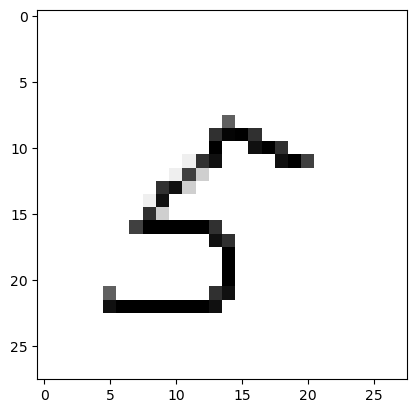

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The number is probably a 9


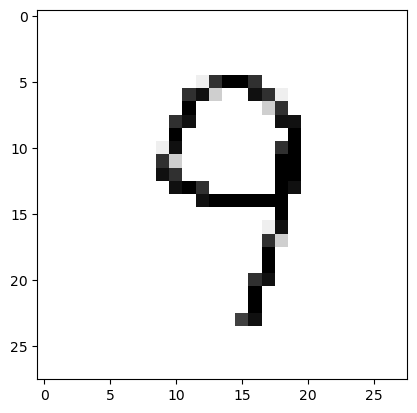

In [20]:
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1